In [ ]:
from google.colab import drive
 
# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


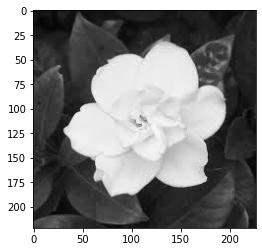

In [ ]:
import numpy as np
import cv2 as cv
import random
import math
from matplotlib import pyplot as plt
img_address = "drive/My Drive/Colab Notebooks/images (3).jpeg"
img = cv.imread(img_address, 0)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
def caclculate_histo(img):
    histo = np.zeros(256, np.int32)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            histo[img[i][j]] += 1
    plt.plot(histo)
    plt.show()  
    return histo

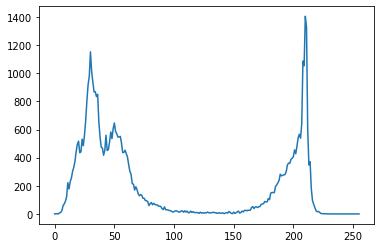

In [ ]:
histo = caclculate_histo(img)

In [ ]:
def median_t(t):
  img_size = len(img[0])*len(img[1])
  median=0
  for i in range(0,t):
    median += i*histo[i]/img_size
  return median

In [ ]:
def teta_t(t):
  img_size = len(img[0])*len(img[1])
  teta=0
  for i in range(0,t):
    teta += histo[i]/img_size
  return teta

In [ ]:
def variance_b(t):
  return np.power(median_t(t)-median_t(255)*teta_t(t),2)/(teta_t(t)*(1-teta_t(t)))

In [ ]:
def maximum_t():
  max,max_i = 0, 0
  for i in range(0 , len(histo)):
    var=variance_b(i)
    if var > max :
      max = var
      max_i = i
  return max_i

In [ ]:
maximum_t()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


115

In [ ]:
def image_segmentation():
  segmented_img = np.zeros((img.shape[0], img.shape[1]), np.int32)
  threshold = maximum_t()
  for i in range(0 ,img.shape[0]) :
    for j in range(0 ,img.shape[1]) :
      if img[i][j]>threshold:
        segmented_img[i][j] = 255
      else :
        segmented_img[i][j] = 0
  result = np.hstack([segmented_img,img])
  plt.title("Segmented image vs image")
  plt.imshow(result, cmap=plt.get_cmap('gray'))
  plt.show()
  return 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


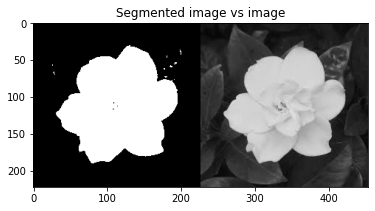

In [ ]:
image_segmentation()